# <b> IMPORTING LIBRARIES

In [34]:
# REQUIRED LIBRARIES

import numpy as np
import pandas as pd
import seaborn as sns
from google.colab import drive
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [61]:
# csv file after initial feature engineering is imported

df=pd.read_csv("/content/drive/MyDrive/CREDIT CARD APPROVAL PROJECT/oversampled_dataset.csv")
df.head()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,MARITAL_STATUS,HOUSE_TYPE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,JOB CATEGORY,BEGIN_MONTHS,STATUS OF LOAN,IS_MALE,OWNS_CAR,OWNS_PROPERTY,age,years_of_experience,TARGET
0,5065438,2.0,270000.0,0.0,0.0,1.0,0,0,0,10,-6,6.0,0,1,0,36.0,6.0,0
1,5142753,0.0,81000.0,0.0,1.0,0.0,1,1,0,12,-4,0.0,0,0,0,49.0,1.0,0
2,5111146,0.0,270000.0,1.0,0.0,0.0,0,1,0,8,0,6.0,1,1,1,54.0,3.0,0
3,5010310,1.0,112500.0,0.0,0.0,0.0,0,0,0,3,-3,0.0,0,1,1,41.0,5.0,0
4,5010835,2.0,139500.0,0.0,0.0,0.0,1,0,0,4,-29,0.0,1,1,1,47.0,15.0,0


In [62]:
df.columns

Index(['ID', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'NAME_EDUCATION_TYPE',
       'MARITAL_STATUS', 'HOUSE_TYPE', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'JOB CATEGORY', 'BEGIN_MONTHS', 'STATUS OF LOAN',
       'IS_MALE', 'OWNS_CAR', 'OWNS_PROPERTY', 'age', 'years_of_experience',
       'TARGET'],
      dtype='object')

# <u> <b> NUMERICAL COLUMNS

In [63]:
df.drop("ID",axis=1,inplace=True)

# <ul>1.  AMT_INCOME_TOTAL


    inference : presence of outliers

In [64]:
df['AMT_INCOME_TOTAL'].skew()

2.189908068230824

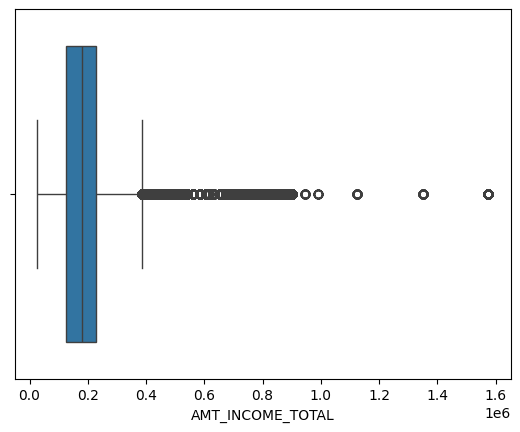

In [65]:
sns.boxplot(x=df['AMT_INCOME_TOTAL'])
plt.show()

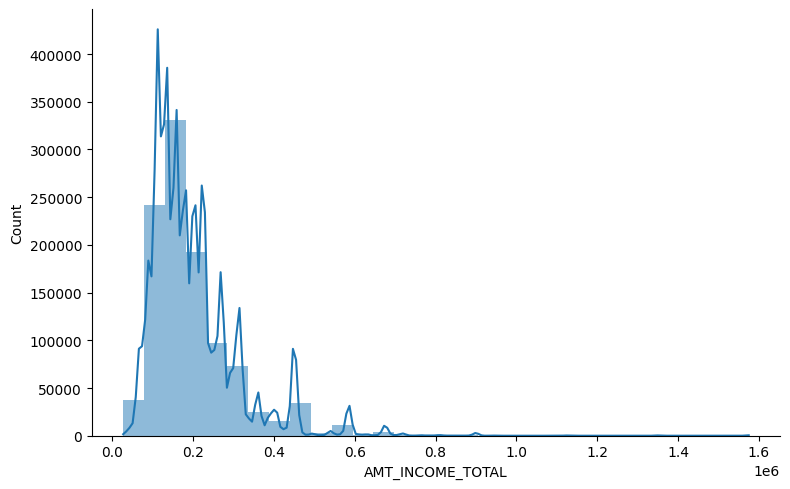

In [68]:
sns.displot(df, x='AMT_INCOME_TOTAL',bins=30, linewidth=0, height=5, kde=True, aspect=1.6)

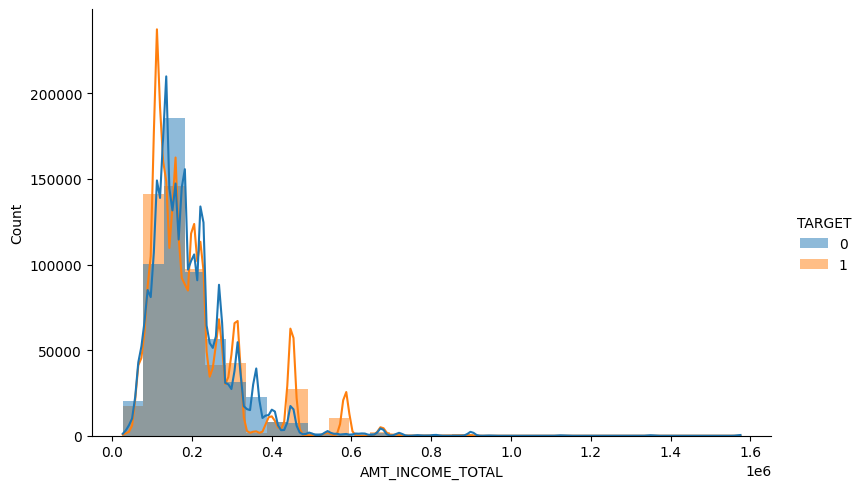

In [67]:
sns.displot(df, x='AMT_INCOME_TOTAL', hue='TARGET', bins=30, linewidth=0, height=5, kde=True, aspect=1.6)
plt.show()

In [75]:
data = df['AMT_INCOME_TOTAL']
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)

# Calculate IQR (Interquartile Range)
iqr = q3 - q1

# Define bounds for outliers
lower_bound = q1 - 2.2 * iqr
upper_bound = q3 + 2.2 * iqr

In [76]:
print(lower_bound,upper_bound )

-101700.00000000003 457200.0


In [77]:

# Identify outliers
outliers = (data < lower_bound) | (data > upper_bound)

# Remove outliers
cleaned_data = data[~outliers]

# Optionally, create a new DataFrame with outliers removed
df= df[~outliers]

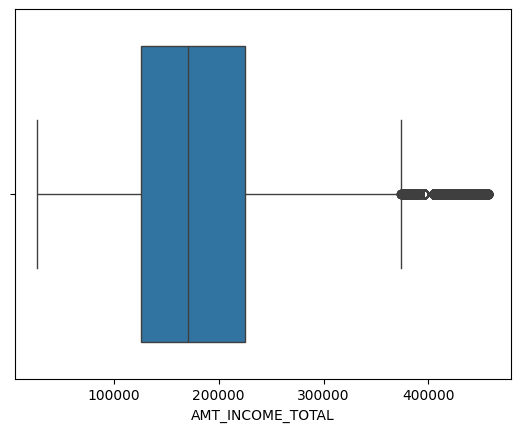

In [78]:
sns.boxplot(x=df['AMT_INCOME_TOTAL'])
plt.show()

# <ul>2. BEGIN_MONTHS

    inference : absence of outliers

In [79]:
df["BEGIN_MONTHS"].skew()

-0.5327619844404298

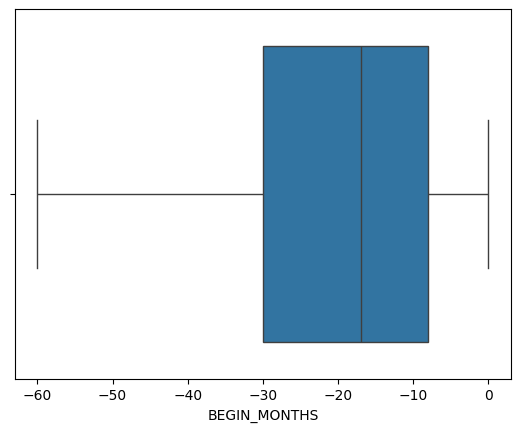

In [80]:
sns.boxplot(x=df['BEGIN_MONTHS'])
plt.show()

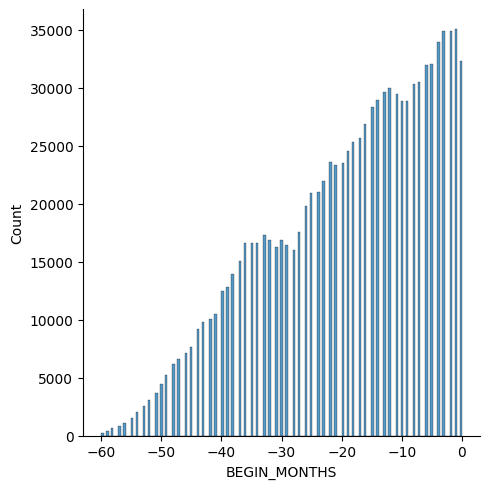

In [52]:
sns.displot(x=df['BEGIN_MONTHS'])
plt.show()

# <ul>3. 'age'

    inference : absence of outliers

In [81]:
df["age"].skew()

0.00048572431994404667

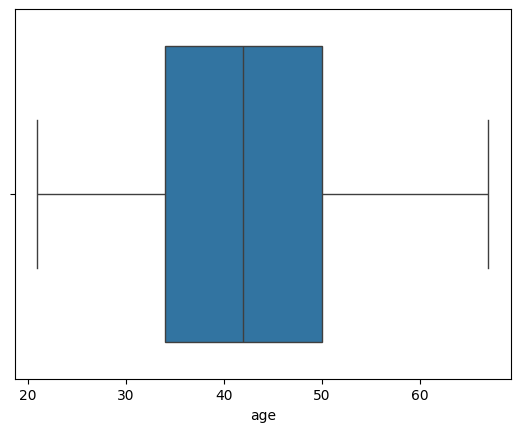

In [82]:
sns.boxplot(x=df['age'])
plt.show()

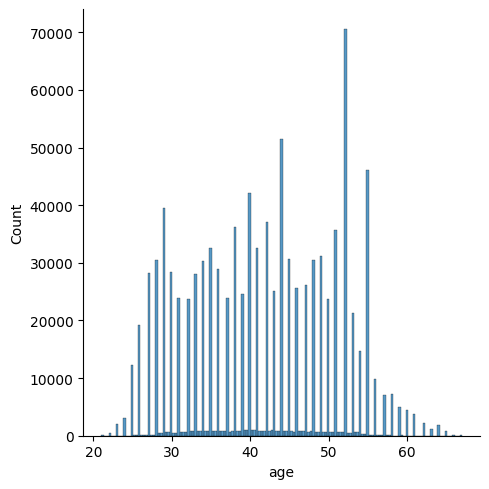

In [83]:
sns.displot(x=df['age'])
plt.show()

# <ul> 4. years_of_experience

    inference : outlier present outside IQR range

In [89]:
df.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,MARITAL_STATUS,HOUSE_TYPE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,JOB CATEGORY,BEGIN_MONTHS,STATUS OF LOAN,IS_MALE,OWNS_CAR,OWNS_PROPERTY,age,years_of_experience,TARGET
0,2.0,270000.0,0.0,0.0,1.0,0,0,0,10,-6,6.0,0,1,0,36.0,6.0,0
1,0.0,81000.0,0.0,1.0,0.0,1,1,0,12,-4,0.0,0,0,0,49.0,1.0,0
2,0.0,270000.0,1.0,0.0,0.0,0,1,0,8,0,6.0,1,1,1,54.0,3.0,0
3,1.0,112500.0,0.0,0.0,0.0,0,0,0,3,-3,0.0,0,1,1,41.0,5.0,0
4,2.0,139500.0,0.0,0.0,0.0,1,0,0,4,-29,0.0,1,1,1,47.0,15.0,0


In [84]:
df["years_of_experience"].skew()

1.7995089712930261

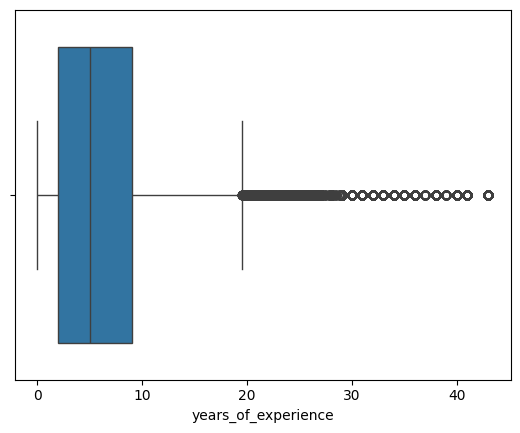

In [85]:
sns.boxplot(x=df['years_of_experience'])
plt.show()

In [93]:
data = df['years_of_experience']

# Calculate quartiles
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)

# Calculate IQR (Interquartile Range)
iqr = q3 - q1

# Define bounds for outliers
lower_bound = q1 - 2.2 * iqr
upper_bound = q3 + 2.2 * iqr

# Identify outliers
outliers = (data < lower_bound) | (data > upper_bound)

# Remove outliers
cleaned_data = data[~outliers]

# Optionally, create a new DataFrame with outliers removed
df= df[~outliers]

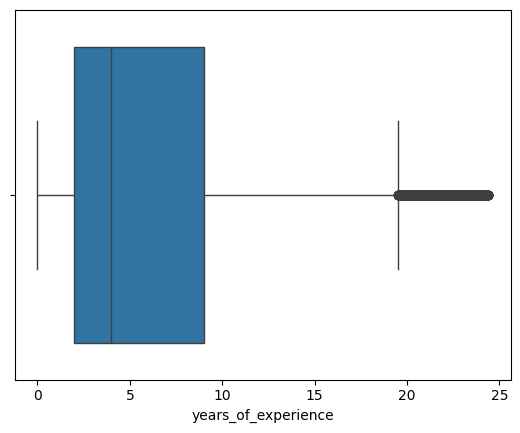

In [94]:
sns.boxplot(x=df['years_of_experience'])
plt.show()

In [95]:
df['years_of_experience'].max()

24.39550956204225

In [96]:
df["years_of_experience"].value_counts()

3.000000    137981
2.000000    130219
1.000000    104489
4.000000     82925
6.000000     63308
             ...  
6.534896         1
6.928209         1
0.162356         1
3.988718         1
2.546842         1
Name: years_of_experience, Length: 58962, dtype: int64

In [98]:
df.shape

(1024428, 17)

# <b> CATEGORICAL COLUMNS

# <ul> 1. 'CNT_CHILDREN'

In [28]:
df['CNT_CHILDREN'].value_counts()

0.0    343151
1.0    127695
2.0     66821
Name: CNT_CHILDREN, dtype: int64

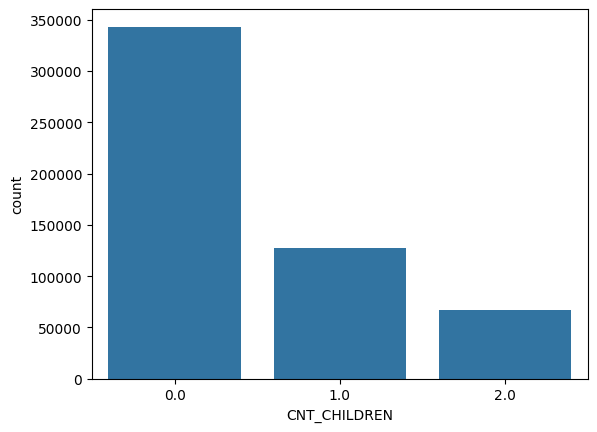

In [27]:
sns.countplot(x='CNT_CHILDREN', data=df)
plt.show()

In [30]:
cross_tab = pd.crosstab(df['CNT_CHILDREN'], df['TARGET'], normalize='index')
cross_tab

# 1 indicates risk user


TARGET,0,1
CNT_CHILDREN,,
0.0,0.996535,0.003465
1.0,0.995403,0.004597
2.0,0.997216,0.002784


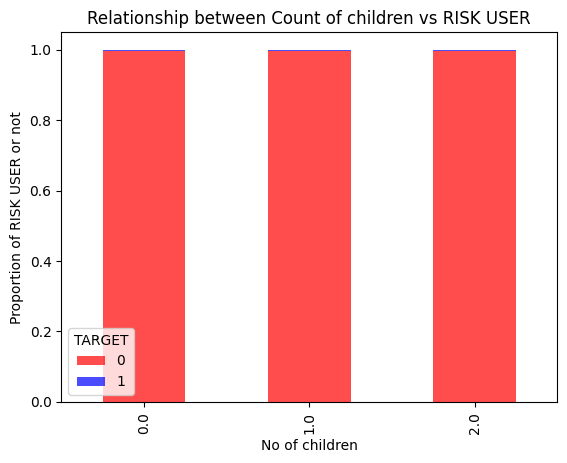

In [32]:
ax = cross_tab.plot(kind='bar', stacked=True, color=['red', 'blue'], alpha=0.7)
ax.set_ylabel('Proportion of RISK USER or not')
ax.set_xlabel('No of children')

plt.title('Relationship between Count of children vs RISK USER')
plt.show()

INFERENCE : NO of risk users are very less due to class imbalance problem

#spare columns

In [ ]:
[#'ID', 'CNT_CHILDREN', #'AMT_INCOME_TOTAL',
 'NAME_EDUCATION_TYPE',
       'MARITAL_STATUS', 'HOUSE_TYPE', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'JOB CATEGORY', #'BEGIN_MONTHS',
 'STATUS OF LOAN',
       'TARGET', 'IS_MALE', 'OWNS_CAR', 'OWNS_PROPERTY',#'age',
       #'years_of_experience'
 ]

In [60]:
# Exporting the dataset
# Assuming df is your DataFrame
df.to_csv('/content/drive/MyDrive/CREDIT CARD APPROVAL PROJECT/oversampled_dataset.csv', index=False)